# Experiments with ImageAI
<b> An open-source python library built to empower developers to build applications and systems with self-contained Deep Learning and Computer Vision capabilities using simple and few lines of code.</b>

> For More Info Please Refer [Image AI documentation](https://imageai.readthedocs.io/en/latest/index.html)

## About Dataset Used
### Intel Image Classfication
###### This is image data of Natural Scenes around the world.This Data contains around 25k images of size 150x150 distributed under 6 categories.

<b> {'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 } <b> 

###### The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

> Source for this data can be found [here](https://www.kaggle.com/puneet6060/intel-image-classification)


## About this Experiment 
##### This Experiment is carried out on Intel Image Classification data with Image AI python library.ImageAI provides training and prediction with few lines of codes.
#### Below State of Art Models were trained with ImageAI-
* Resnet
* SqueezeNet
* InceptionV3
* DenseNet

*Note* - Experiments were carried out on g4dn.8xlarge Single GPU AWS VM.

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.utils.data_utils import GeneratorEnqueuer
from imageai.Prediction.Custom import CustomImagePrediction
from imageai.Prediction.Custom import ModelTraining
from imageai.Prediction import ImagePrediction
import os


In [13]:
train_dir = './data'
json_execution_path_resnet = './data/json/resnet_json'
model_execution_path_resnet = './data/models/resnet'
json_execution_path_squeezenet = './data/json/squeezenet_json'
model_execution_path_squeezenet='./data/models/squeezenet'
json_execution_path_inception= './data/json/inception_v3_json'
model_execution_path_inception='./data/models/inception_v3'
json_execution_path_dense= './data/json/densenet_json'
model_execution_path_dense='./data/models/densenet'

In [3]:
batch_size = 100
img_generator = ImageDataGenerator().flow_from_directory(train_dir, shuffle=False, batch_size = batch_size)
n_rounds = math.ceil(img_generator.samples / img_generator.batch_size)
filenames = img_generator.filenames

img_generator = GeneratorEnqueuer(img_generator)
img_generator.start()
img_generator = img_generator.get()

Found 17040 images belonging to 7 classes.


## ResNet50 by Microsoft Research 
ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.
<img src = 'https://www.researchgate.net/publication/331364877/figure/fig3/AS:741856270901252@1553883726825/Left-ResNet50-architecture-Blocks-with-dotted-line-represents-modules-that-might-be.png'>

In [9]:
model_trainer = ModelTraining()
model_trainer.setModelTypeAsResNet()
model_trainer.setDataDirectory(train_dir)

In [ ]:
model_trainer.trainModel(num_objects=6, num_experiments=10, enhance_data=True, batch_size=128, show_network_summary=True)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_345 (Conv2D)             (None, 112, 112, 64) 9472        input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_321 (BatchN (None, 112, 112, 64) 256         conv2d_345[0][0]                 
__________________________________________________________________________________________________
activation_342 (Activation)     (None, 112, 112, 64) 0           batch_normalization_321[0][0]    
____________________________________________________________________________________________

Using Enhanced Data Generation
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
JSON Mapping for the model classes saved to  ./data/json/model_class.json
Number of experiments (Epochs) :  10
Epoch 1/10
108/109 [============================>.] - ETA: 19s - loss: 1.1949 - acc: 0.5936
Epoch 00001: val_acc improved from -inf to 0.18512, saving model to ./data/models/model_ex-001_acc-0.185122.h5
109/109 [==============================] - 2259s 21s/step - loss: 1.1909 - acc: 0.5949 - val_loss: 3.7531 - val_acc: 0.1851
Epoch 2/10
 51/109 [=============>................] - ETA: 18:44 - loss: 0.7556 - acc: 0.7131

#### Prediction on Single Image

street : 96.47598266601562
buildings : 3.324737772345543
glacier : 0.11322081554681063
sea : 0.06178756011649966
forest : 0.017569320334587246
mountain : 0.006695268530165777


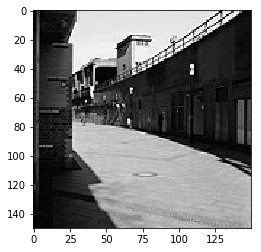

In [5]:
execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(model_execution_path_resnet, "model_ex-009_acc-0.870924.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_resnet, "model_class.json"))
prediction.loadModel(num_objects=6)

plt.imshow(plt.imread(execution_path + "/20069.jpg"))

predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "20069.jpg"), result_count=6)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(str(eachPrediction) + " : " + str(eachProbability))

#### Prediction on Multiple Images

In [11]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(model_execution_path_resnet, "model_ex-009_acc-0.870924.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_resnet, "model_class.json"))
prediction.loadModel(num_objects=6)

all_images_array = []
execution_path = os.getcwd()


all_files = os.listdir(execution_path)
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(each_file)
        

results_array = prediction.predictMultipleImages(all_images_array, result_count_per_image=5)

for each_result in results_array:
    predictions, percentage_probabilities = each_result["predictions"], each_result["percentage_probabilities"]
    for index in range(len(predictions)):
        print(predictions[index] , " : " , percentage_probabilities[index])
    print("-----------------------")

mountain  :  93.1736707687378
glacier  :  6.618795543909073
forest  :  0.0807064410764724
buildings  :  0.05853909533470869
sea  :  0.05602868623100221
-----------------------
sea  :  83.69539380073547
buildings  :  6.361795961856842
glacier  :  4.55608144402504
mountain  :  3.6217276006937027
street  :  1.467070821672678
-----------------------
glacier  :  52.3485004901886
forest  :  37.50199377536774
sea  :  7.271964848041534
mountain  :  1.563781127333641
buildings  :  1.223194319754839
-----------------------
forest  :  54.809290170669556
street  :  35.95429062843323
buildings  :  8.918099105358124
glacier  :  0.26435337495058775
sea  :  0.038525249692611396
-----------------------
glacier  :  81.10048174858093
sea  :  11.605756729841232
forest  :  4.1877321898937225
mountain  :  2.330157160758972
buildings  :  0.6157563533633947
-----------------------
street  :  96.47598266601562
buildings  :  3.324737772345543
glacier  :  0.11322081554681063
sea  :  0.06178756011649966
forest  :

## Squeezenet
With equivalent accuracy, smaller CNN architectures offer at least three advantages
* Smaller Convolutional Neural Networks (CNNs) require less communication across servers during distributed training.
* Smaller CNNs require less bandwidth to export a new model from the cloud to an autonomous car.
* Smaller CNNs are more feasible to deploy on FPGAs and other hardware with limited memory.
<img src = "https://miro.medium.com/max/1400/1*XQGAKZb8kjoF_1lSXeIQxg.png">

In [22]:
model_trainer = ModelTraining()
model_trainer.setModelTypeAsSqueezeNet()
model_trainer.setDataDirectory(train_dir)

In [23]:
model_trainer.trainModel(num_objects=6, num_experiments=10, enhance_data=True, batch_size=128, show_network_summary=True)

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_689 (Conv2D)             (None, 111, 111, 64) 1792        input_14[0][0]                   
__________________________________________________________________________________________________
activation_650 (Activation)     (None, 111, 111, 64) 0           conv2d_689[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 55, 55, 64)   0           activation_650[0][0]             
___________________________________________________________________________________________

Using Enhanced Data Generation
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
JSON Mapping for the model classes saved to  ./data/json/model_class.json
Number of experiments (Epochs) :  10
Epoch 1/10
108/109 [============================>.] - ETA: 1s - loss: 1.7913 - acc: 0.1782
Epoch 00002: val_acc did not improve from 0.17697
109/109 [==============================] - 205s 2s/step - loss: 1.7913 - acc: 0.1786 - val_loss: 1.7915 - val_acc: 0.1770
Epoch 3/10
108/109 [============================>.] - ETA: 1s - loss: 1.7913 - acc: 0.1805
Epoch 00003: val_acc did not improve from 0.17697
109/109 [==============================] - 204s 2s/step - loss: 1.7913 - acc: 0.1805 - val_loss: 1.7914 - val_acc: 0.1770
Epoch 4/10
108/109 [============================>.] - ETA: 1s - loss: 1.7914 - acc: 0.1776
Epoch 00004: val_acc did not improve from 0.17697
109/109 [==============================] - 203s 2s/step - loss: 1.7914 - acc: 0.1774 - val_loss: 1.7914 - 

#### Prediction on Single Image

mountain : 17.837493121623993
street : 16.432499885559082
sea : 16.432499885559082
glacier : 16.432499885559082
forest : 16.432499885559082
buildings : 16.432499885559082


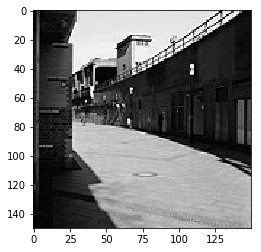

In [6]:
execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsSqueezeNet()
prediction.setModelPath(os.path.join(model_execution_path_squeezenet, "model_ex-001_acc-0.176970.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_squeezenet, "model_class.json"))
prediction.loadModel(num_objects=6)

plt.imshow(plt.imread(execution_path + "/20069.jpg"))

predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "20069.jpg"), result_count=6)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(str(eachPrediction) + " : " + str(eachProbability))

#### Prediction on Multiple Images

In [10]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsSqueezeNet()
prediction.setModelPath(os.path.join(model_execution_path_squeezenet, "model_ex-001_acc-0.176970.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_squeezenet, "model_class.json"))
prediction.loadModel(num_objects=6)

all_images_array = []
execution_path = os.getcwd()


all_files = os.listdir(execution_path)
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(each_file)
        

results_array = prediction.predictMultipleImages(all_images_array, result_count_per_image=5)

for each_result in results_array:
    predictions, percentage_probabilities = each_result["predictions"], each_result["percentage_probabilities"]
    for index in range(len(predictions)):
        print(predictions[index] , " : " , percentage_probabilities[index])
    print("-----------------------")

mountain  :  17.83749610185623
street  :  16.4325013756752
sea  :  16.4325013756752
glacier  :  16.4325013756752
forest  :  16.4325013756752
-----------------------
mountain  :  17.837511003017426
street  :  16.432498395442963
sea  :  16.432498395442963
glacier  :  16.432498395442963
forest  :  16.432498395442963
-----------------------
mountain  :  17.83752739429474
street  :  16.432495415210724
sea  :  16.432495415210724
glacier  :  16.432495415210724
forest  :  16.432495415210724
-----------------------
mountain  :  17.837464809417725
street  :  16.43250733613968
sea  :  16.43250733613968
glacier  :  16.43250733613968
forest  :  16.43250733613968
-----------------------
mountain  :  17.837509512901306
street  :  16.432499885559082
sea  :  16.432499885559082
glacier  :  16.432499885559082
forest  :  16.432499885559082
-----------------------
mountain  :  17.837493121623993
street  :  16.432499885559082
sea  :  16.432499885559082
glacier  :  16.432499885559082
forest  :  16.4324998855

## InceptionV3 by Google Brain team 

With 42 layers, lower error rate is obtained and make it become the 1st Runner Up for image classification in ILSVRC (ImageNet Large Scale Visual Recognition Competition) 2015.The Inception deep convolutional architecture was introduced as GoogLeNet in (Szegedy et al. 2015a), here named Inception-v1. Later the Inception architecture was refined in various ways, first by the introduction of batch normalization (Ioffe and Szegedy 2015) (Inception-v2). Later by additional factorization ideas in the third iteration (Szegedy et al. 2015b) which will be referred to as Inception-v3 in this report.
<img src = " https://cloud.google.com/tpu/docs/images/inceptionv3onc--oview.png">

In [24]:
model_trainer = ModelTraining()
model_trainer.setModelTypeAsInceptionV3()
model_trainer.setDataDirectory(train_dir)

In [25]:
model_trainer.trainModel(num_objects=6, num_experiments=10, enhance_data=True, batch_size=128, show_network_summary=True)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_714 (Conv2D)             (None, 111, 111, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_689 (BatchN (None, 111, 111, 32) 96          conv2d_714[0][0]                 
__________________________________________________________________________________________________
activation_677 (Activation)     (None, 111, 111, 32) 0           batch_normalization_689[0][0]    
_______________________________________________________________________________________

Using Enhanced Data Generation
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
JSON Mapping for the model classes saved to  ./data/json/model_class.json
Number of experiments (Epochs) :  10
Epoch 1/10
108/109 [============================>.] - ETA: 10s - loss: 0.9934 - acc: 0.6396
Epoch 00001: val_acc improved from -inf to 0.16950, saving model to ./data/models/model_ex-001_acc-0.169497.h5
109/109 [==============================] - 1310s 12s/step - loss: 0.9898 - acc: 0.6409 - val_loss: 3.6134 - val_acc: 0.1695
Epoch 2/10
108/109 [============================>.] - ETA: 9s - loss: 0.6178 - acc: 0.7775 
Epoch 00002: val_acc improved from 0.16950 to 0.17833, saving model to ./data/models/model_ex-002_acc-0.178329.h5
109/109 [==============================] - 1097s 10s/step - loss: 0.6171 - acc: 0.7777 - val_loss: 4.1410 - val_acc: 0.1783
Epoch 3/10
108/109 [============================>.] - ETA: 9s - loss: 0.5050 - acc: 0.8191 
Epoch 00003: val_acc imp

#### Prediction on Single Image

street : 94.36639547348022
buildings : 4.772735759615898
glacier : 0.43998220935463905
sea : 0.2061385428532958
mountain : 0.11465854477137327
forest : 0.10008802637457848


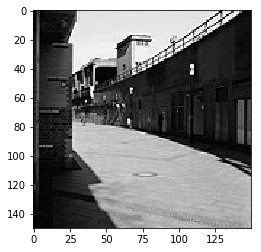

In [7]:
execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsInceptionV3()
prediction.setModelPath(os.path.join(model_execution_path_inception, "model_ex-009_acc-0.889606.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_inception, "model_class.json"))
prediction.loadModel(num_objects=6)

plt.imshow(plt.imread(execution_path + "/20069.jpg"))

predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "20069.jpg"), result_count=6)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(str(eachPrediction) + " : " + str(eachProbability))

#### Prediction on Multiple Images

In [9]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsInceptionV3()
prediction.setModelPath(os.path.join(model_execution_path_inception, "model_ex-009_acc-0.889606.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_inception, "model_class.json"))
prediction.loadModel(num_objects=6)

all_images_array = []
execution_path = os.getcwd()


all_files = os.listdir(execution_path)
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(each_file)
        

results_array = prediction.predictMultipleImages(all_images_array, result_count_per_image=5)

for each_result in results_array:
    predictions, percentage_probabilities = each_result["predictions"], each_result["percentage_probabilities"]
    for index in range(len(predictions)):
        print(predictions[index] , " : " , percentage_probabilities[index])
    print("-----------------------")

mountain  :  97.60668277740479
glacier  :  2.3541247472167015
sea  :  0.019868170784320682
forest  :  0.016758477431721985
street  :  0.0015284276742022485
-----------------------
sea  :  88.41244578361511
buildings  :  3.6867529153823853
mountain  :  3.514944761991501
glacier  :  2.421761676669121
street  :  1.8096443265676498
-----------------------
glacier  :  52.0125150680542
forest  :  40.46682417392731
sea  :  5.4787322878837585
street  :  0.912905391305685
buildings  :  0.5716358777135611
-----------------------
street  :  54.26223874092102
buildings  :  44.26106512546539
glacier  :  0.6954808719456196
forest  :  0.6441501900553703
sea  :  0.10877868626266718
-----------------------
glacier  :  86.59015893936157
sea  :  6.823929399251938
mountain  :  4.929489269852638
buildings  :  1.067409198731184
forest  :  0.3079771064221859
-----------------------
street  :  94.36639547348022
buildings  :  4.772735759615898
glacier  :  0.43998220935463905
sea  :  0.2061385428532958
mountain

## DenseNet
DenseNet architecture is new, it is a logical extension of ResNet.ResNet architecture has a fundamental building block (Identity) where you merge (additive) a previous layer into a future layer. Reasoning here is by adding additive merges we are forcing the network to learn residuals (errors i.e. diff between some previous layer and current one). In contrast, DenseNet paper proposes concatenating outputs from the previous layers instead of using the summation.
<img src = "https://miro.medium.com/max/1400/1*gAGIm5uaaUukJOSzMW6saQ.jpeg">

In [26]:
model_trainer = ModelTraining()
model_trainer.setModelTypeAsDenseNet()
model_trainer.setDataDirectory(train_dir)

In [ ]:
model_trainer.trainModel(num_objects=6, num_experiments=10, enhance_data=True, batch_size=128, show_network_summary=True)

Model: "densenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_808 (Conv2D)             (None, 112, 112, 64) 9408        input_16[0][0]                   
__________________________________________________________________________________________________
batch_normalization_783 (BatchN (None, 112, 112, 64) 256         conv2d_808[0][0]                 
__________________________________________________________________________________________________
activation_771 (Activation)     (None, 112, 112, 64) 0           batch_normalization_783[0][0]    
___________________________________________________________________________________________

Using Enhanced Data Generation
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
JSON Mapping for the model classes saved to  ./data/json/model_class.json
Number of experiments (Epochs) :  10
Epoch 1/10
108/109 [============================>.] - ETA: 27s - loss: 2.4231 - acc: 0.6843
Epoch 00001: val_acc improved from -inf to 0.36073, saving model to ./data/models/model_ex-001_acc-0.360734.h5
109/109 [==============================] - 3388s 31s/step - loss: 2.4204 - acc: 0.6850 - val_loss: 3.4304 - val_acc: 0.3607
Epoch 2/10
108/109 [============================>.] - ETA: 26s - loss: 1.9041 - acc: 0.7838
Epoch 00002: val_acc did not improve from 0.36073
109/109 [==============================] - 3005s 28s/step - loss: 1.9026 - acc: 0.7839 - val_loss: 4.1789 - val_acc: 0.3196
Epoch 3/10
108/109 [============================>.] - ETA: 26s - loss: 1.5779 - acc: 0.8153
Epoch 00003: val_acc improved from 0.36073 to 0.45482, saving model to ./data/models/mod

#### Prediction on Single Image

street : 96.07321619987488
buildings : 3.584859147667885
sea : 0.2628482645377517
glacier : 0.07031658315099776
mountain : 0.0071489979745820165
forest : 0.0016079438864835538


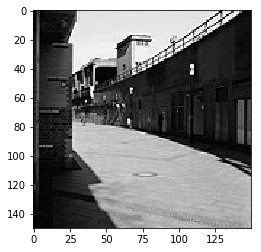

In [8]:
execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(model_execution_path_dense, "model_ex-004_acc-0.588655.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_dense, "model_class.json"))
prediction.loadModel(num_objects=6)

plt.imshow(plt.imread(execution_path + "/20069.jpg"))

predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "20069.jpg"), result_count=6)

for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(str(eachPrediction) + " : " + str(eachProbability))

#### Prediction on Multiple Images

In [12]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(model_execution_path_dense, "model_ex-004_acc-0.588655.h5"))
prediction.setJsonPath(os.path.join(json_execution_path_dense, "model_class.json"))
prediction.loadModel(num_objects=6)

all_images_array = []
execution_path = os.getcwd()


all_files = os.listdir(execution_path)
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(each_file)
        

results_array = prediction.predictMultipleImages(all_images_array, result_count_per_image=5)

for each_result in results_array:
    predictions, percentage_probabilities = each_result["predictions"], each_result["percentage_probabilities"]
    for index in range(len(predictions)):
        print(predictions[index] , " : " , percentage_probabilities[index])
    print("-----------------------")

sea  :  98.87569546699524
buildings  :  0.650488119572401
glacier  :  0.2104329876601696
street  :  0.2095109550282359
mountain  :  0.05288430256769061
-----------------------
sea  :  98.35565090179443
buildings  :  0.8732283487915993
glacier  :  0.4029668867588043
street  :  0.3444458357989788
mountain  :  0.023331731790676713
-----------------------
forest  :  72.45332598686218
sea  :  14.823949337005615
glacier  :  6.799425929784775
mountain  :  4.752912372350693
buildings  :  1.0475127026438713
-----------------------
street  :  74.61015582084656
buildings  :  25.338822603225708
forest  :  0.03478628059383482
sea  :  0.012277447967790067
glacier  :  0.0039003749407129362
-----------------------
sea  :  55.87366819381714
mountain  :  15.332761406898499
forest  :  14.670214056968689
glacier  :  11.24257817864418
buildings  :  2.5020726025104523
-----------------------
street  :  96.07321619987488
buildings  :  3.584859147667885
sea  :  0.2628482645377517
glacier  :  0.070316583150997

## END